In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
original_image = cv2.imread('real.jpg')
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [3]:
vectorized = img.reshape((-1, 3))
vectorized = np.float32(vectorized)

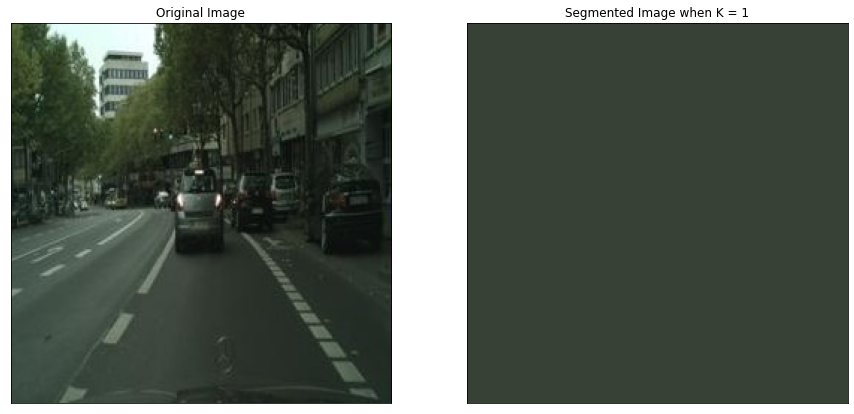

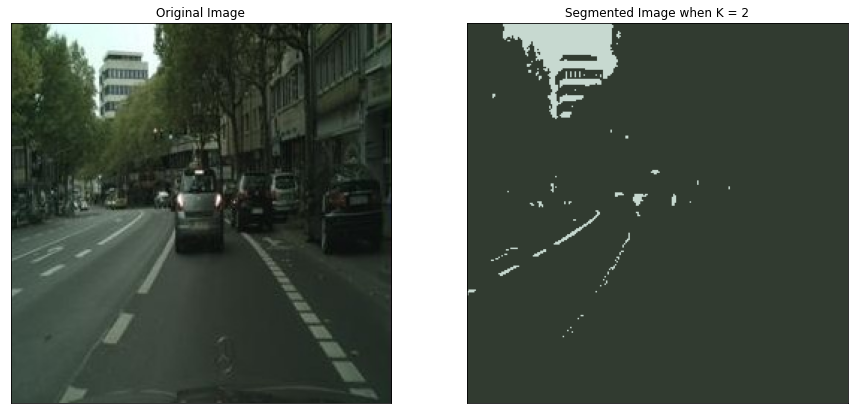

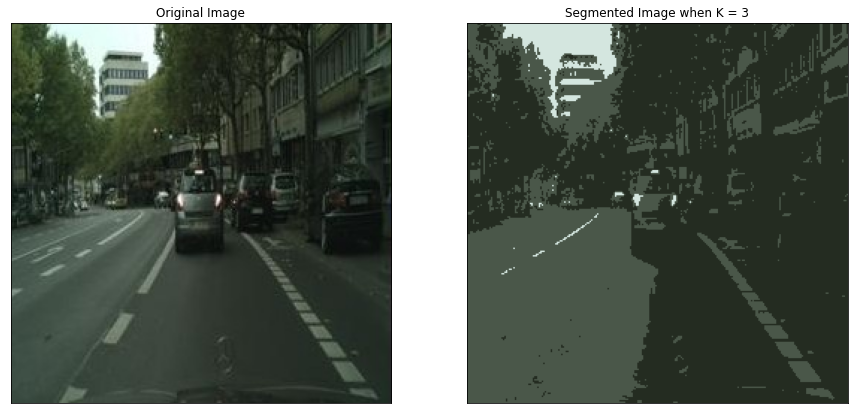

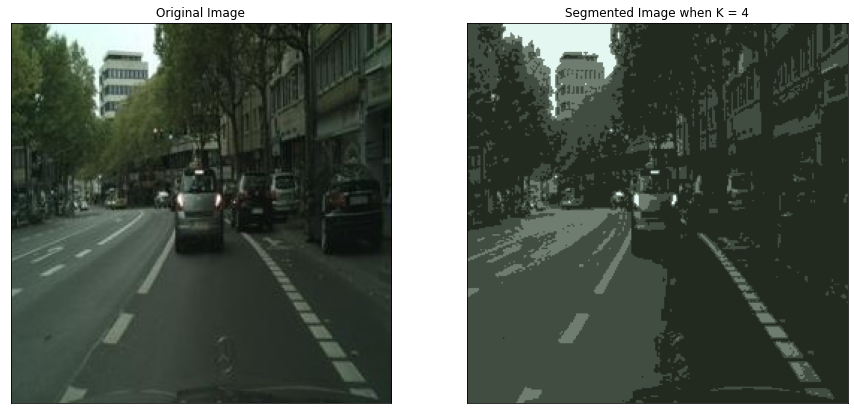

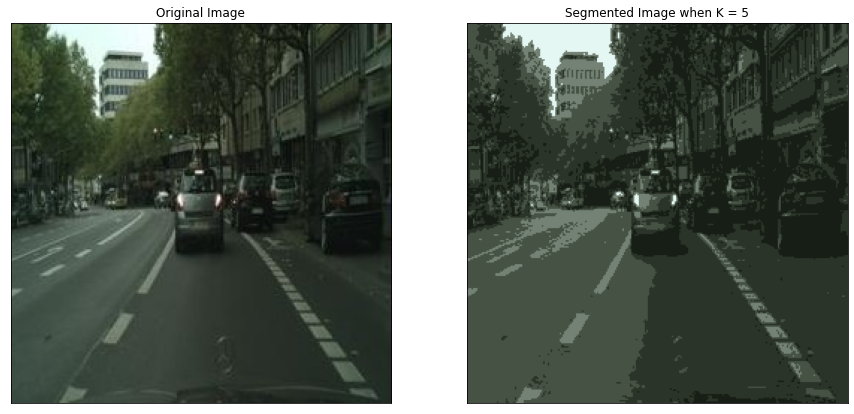

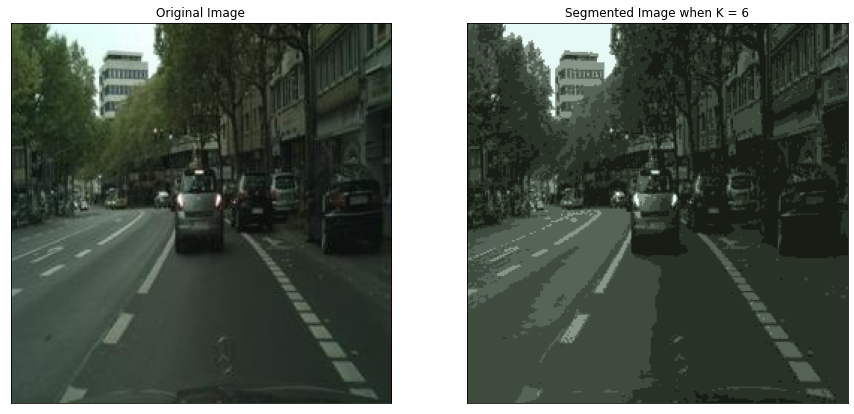

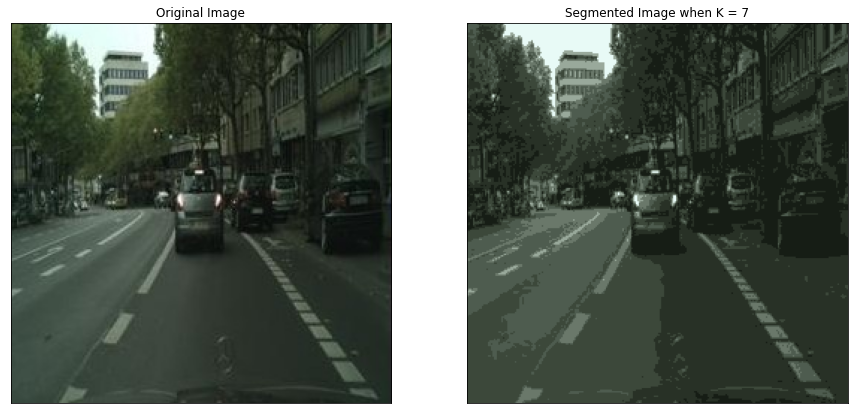

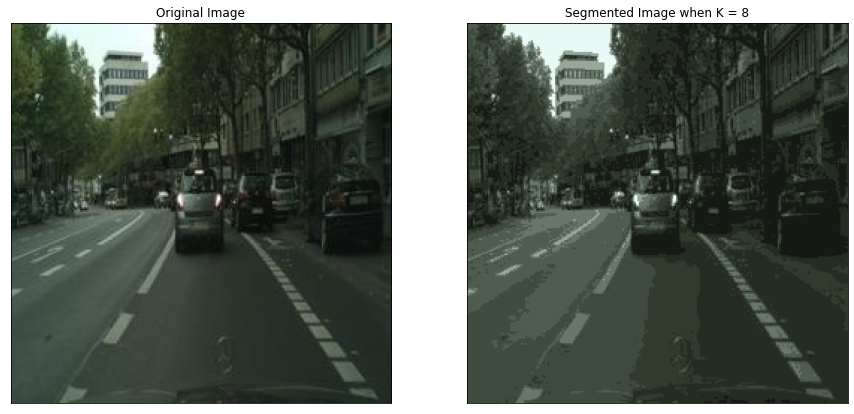

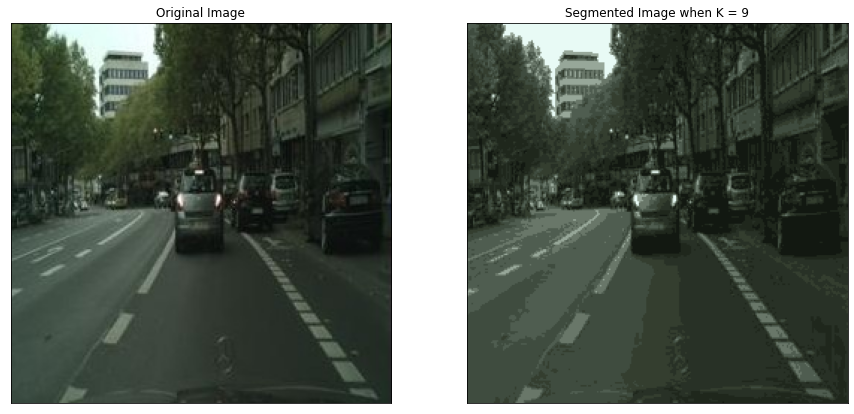

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
figure_size = 15
squared_distances = []
for K in range(1, 10):
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    squared_distances.append(ret)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()

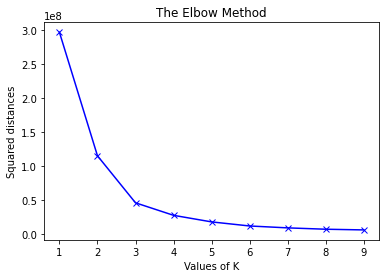

In [5]:
plt.plot(range(1, 10), squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Squared distances')
plt.title('The Elbow Method')
plt.show()

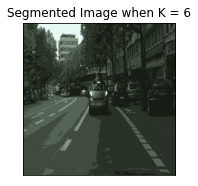